In [165]:
from os.path import join, dirname, exists
import warnings
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data loading

In [6]:
DATA_DIR = 'data'

In [7]:
main_train_f = join(DATA_DIR, 'application_train.csv')
main_test_f = join(DATA_DIR, 'application_test.csv')

In [8]:
df_main_train = pd.read_csv(main_train_f)

In [9]:
df_main_test = pd.read_csv(main_test_f)

### Utils

In [148]:
def get_rare_values(df, col, thresh = 0.005):
    vc = df[col].value_counts()
    return set(vc.index[vc/df_main_train.shape[0] < thresh])

### Data analisys

In [13]:
df_main_train.shape

(307511, 122)

In [14]:
df_main_test.shape

(48744, 121)

In [15]:
df_main_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [88]:
df_main_train.describe(include=['object', 'bool'])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [39]:
columns_with_nulls = list(df_main_train.columns[df_main_train.isnull().sum() != 0])

###  Object columns

In [320]:
def show_cat_info(df, col):
    print(col)
    print('\nValue counts, train dataset:\n')
    print(df_main_train[col].value_counts())
    print('\nCount pecentage, train dataset:\n')
    print(df_main_train[col].value_counts()/df_main_train.shape[0])
    print('\nUnique values in test dataset:\n')
    print(list(df_main_test[col].unique()))
    print('\nNumber of null values: {}'.format(df_main_train[col].isnull().sum()))
    
    

In [143]:
binary_mapper = {}
categorical_mapper = {}

In [64]:
list(df_main_train.columns[df_main_train.dtypes == object])

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

#### 'NAME_CONTRACT_TYPE'

In [321]:
show_cat_info(df_main_train, 'NAME_CONTRACT_TYPE')

NAME_CONTRACT_TYPE

Value counts, train dataset:

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Count pecentage, train dataset:

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

Unique values in test dataset:

['Cash loans', 'Revolving loans']

Number of null values: 0


In [322]:
binary_mapper['NAME_CONTRACT_TYPE'] =  {"Cash loans": 1, "Revolving loans": 0}

#### 'CODE_GENDER'

In [323]:
show_cat_info(df_main_train, 'CODE_GENDER')

CODE_GENDER

Value counts, train dataset:

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Count pecentage, train dataset:

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

Unique values in test dataset:

['F', 'M']

Number of null values: 0


In [324]:
# Map XNA as major F
binary_mapper['CODE_GENDER'] =  {'M': 1, 'F': 0, 'XNA':0}

#### 'FLAG_OWN_CAR'

In [325]:
show_cat_info(df_main_train, 'FLAG_OWN_CAR')

FLAG_OWN_CAR

Value counts, train dataset:

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Count pecentage, train dataset:

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64

Unique values in test dataset:

['N', 'Y']

Number of null values: 0


In [326]:
binary_mapper['FLAG_OWN_CAR'] =  {'Y': 1, 'N': 0}

#### FLAG_OWN_REALTY

In [327]:
show_cat_info(df_main_train, 'FLAG_OWN_REALTY')

FLAG_OWN_REALTY

Value counts, train dataset:

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Count pecentage, train dataset:

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64

Unique values in test dataset:

['Y', 'N']

Number of null values: 0


In [328]:
binary_mapper['FLAG_OWN_REALTY'] =  {'Y': 1, 'N': 0}

#### 'NAME_TYPE_SUITE'

In [329]:
show_cat_info(df_main_train, 'NAME_TYPE_SUITE')

NAME_TYPE_SUITE

Value counts, train dataset:

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Count pecentage, train dataset:

Unaccompanied      0.808186
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

Unique values in test dataset:

['Unaccompanied', nan, 'Family', 'Spouse, partner', 'Group of people', 'Other_B', 'Children', 'Other_A']

Number of null values: 1292


In [97]:
df_main_train['NAME_TYPE_SUITE'].isnull().sum()/df_main_train.shape[0]

0.0042014757195677557

In [196]:
rare_values = get_rare_values(df_main_train, 'NAME_TYPE_SUITE')

In [197]:
rare_values

{'Group of people', 'Other_A'}

In [201]:
df_rare_nts = df_main_train[df_main_train['NAME_TYPE_SUITE'].isin(rare_values)]

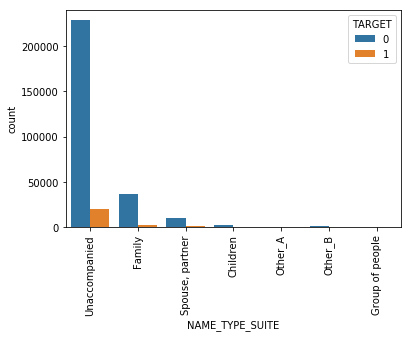

In [202]:
g = sns.countplot(x='NAME_TYPE_SUITE', hue='TARGET', data=df_main_train)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

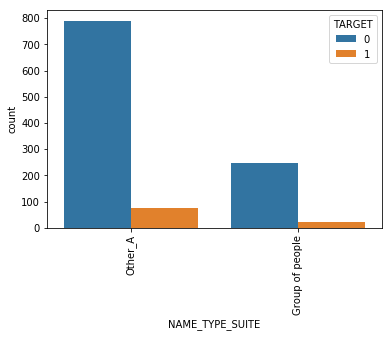

In [203]:
g = sns.countplot(x='NAME_TYPE_SUITE', hue='TARGET', data=df_rare_nts )
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [237]:
categorical_mapper['NAME_TYPE_SUITE'] =  {'fillna': 'none', 'features':{value : 'rare' for value in rare_values}}

#### 'NAME_INCOME_TYPE'

In [330]:
show_cat_info(df_main_train, 'NAME_INCOME_TYPE')

NAME_INCOME_TYPE

Value counts, train dataset:

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Count pecentage, train dataset:

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

Unique values in test dataset:

['Working', 'State servant', 'Pensioner', 'Commercial associate', 'Businessman', 'Student', 'Unemployed']

Number of null values: 0


In [156]:
rare_values = get_rare_values(df_main_train, 'NAME_INCOME_TYPE')

In [188]:
df_rare_nit = df_main_train[df_main_train['NAME_INCOME_TYPE'].isin(rare_values)]

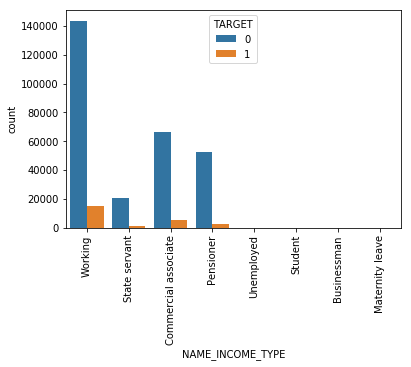

In [191]:
g = sns.countplot(x='NAME_INCOME_TYPE', hue='TARGET', data=df_main_train)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

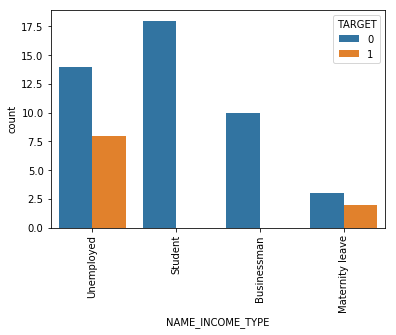

In [190]:
g = sns.countplot(x='NAME_INCOME_TYPE', hue='TARGET', data=df_rare_nit)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [213]:
categorical_mapper['NAME_INCOME_TYPE'] =  {'fillna': None, 'features':{value : 'rare' for value in rare_values}}

#### ????

#### 'NAME_EDUCATION_TYPE'

In [331]:
show_cat_info(df_main_train, 'NAME_EDUCATION_TYPE')

NAME_EDUCATION_TYPE

Value counts, train dataset:

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

Count pecentage, train dataset:

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

Unique values in test dataset:

['Higher education', 'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

Number of null values: 0


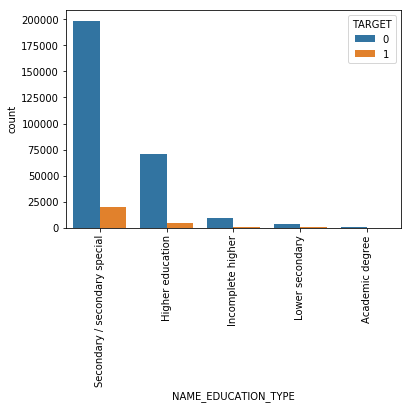

In [210]:
g = sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=df_main_train)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [212]:
categorical_mapper['NAME_EDUCATION_TYPE'] =  {'fillna': None, 'features': None}

#### 'NAME_FAMILY_STATUS'

In [332]:
show_cat_info(df_main_train, 'NAME_FAMILY_STATUS')

NAME_FAMILY_STATUS

Value counts, train dataset:

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

Count pecentage, train dataset:

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

Unique values in test dataset:

['Married', 'Single / not married', 'Civil marriage', 'Widow', 'Separated']

Number of null values: 0


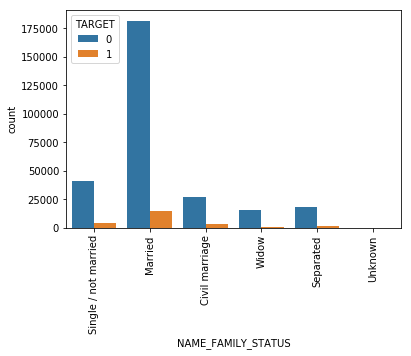

In [219]:
g = sns.countplot(x='NAME_FAMILY_STATUS', hue='TARGET', data=df_main_train)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [222]:
# 'Unknown' chages to majoi 'Married'
categorical_mapper['NAME_FAMILY_STATUS'] =  {'fillna': None, 'features': {'Unknown' : 'Married'}}

#### 'NAME_HOUSING_TYPE'

In [333]:
show_cat_info(df_main_train, 'NAME_HOUSING_TYPE')

NAME_HOUSING_TYPE

Value counts, train dataset:

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

Count pecentage, train dataset:

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64

Unique values in test dataset:

['House / apartment', 'With parents', 'Rented apartment', 'Municipal apartment', 'Office apartment', 'Co-op apartment']

Number of null values: 0


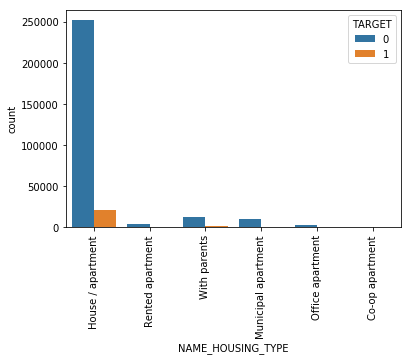

In [229]:
g = sns.countplot(x='NAME_HOUSING_TYPE', hue='TARGET', data=df_main_train)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [230]:
df_rare_nht = df_main_train[df_main_train['NAME_HOUSING_TYPE'].isin(['Rented apartment', 'Office apartment', 'Co-op apartment'])]

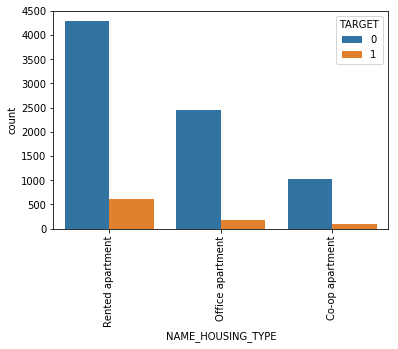

In [232]:
g = sns.countplot(x='NAME_HOUSING_TYPE', hue='TARGET', data=df_rare_nht)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [233]:
categorical_mapper['NAME_HOUSING_TYPE'] =  {'fillna': None, 'features': None}

#### 'OCCUPATION_TYPE'

In [334]:
show_cat_info(df_main_train, 'OCCUPATION_TYPE')

OCCUPATION_TYPE

Value counts, train dataset:

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Count pecentage, train dataset:

Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff      

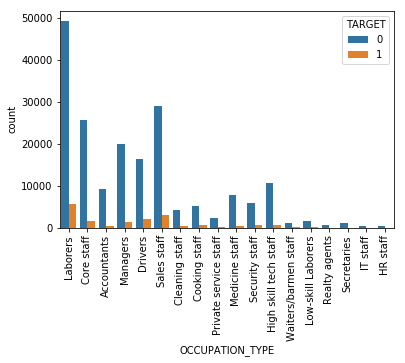

In [243]:
g = sns.countplot(x='OCCUPATION_TYPE', hue='TARGET', data=df_main_train)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [244]:
rare_values_ot = get_rare_values(df_main_train, 'OCCUPATION_TYPE')

In [245]:
df_rare_ot = df_main_train[df_main_train['OCCUPATION_TYPE'].isin(rare_values_ot)]

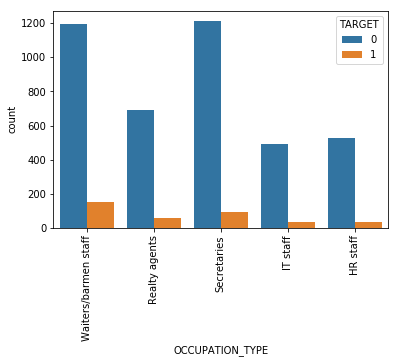

In [260]:
g = sns.countplot(x='OCCUPATION_TYPE', hue='TARGET', data=df_rare_ot)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [280]:
group_ot = df_main_train.groupby(df_main_train['OCCUPATION_TYPE']).sum()['TARGET']
group_ot/ df_main_train.groupby(df_main_train['OCCUPATION_TYPE']).count()['TARGET']

OCCUPATION_TYPE
Accountants              0.048303
Cleaning staff           0.096067
Cooking staff            0.104440
Core staff               0.063040
Drivers                  0.113261
HR staff                 0.063943
High skill tech staff    0.061599
IT staff                 0.064639
Laborers                 0.105788
Low-skill Laborers       0.171524
Managers                 0.062140
Medicine staff           0.067002
Private service staff    0.065988
Realty agents            0.078562
Sales staff              0.096318
Secretaries              0.070498
Security staff           0.107424
Waiters/barmen staff     0.112760
Name: TARGET, dtype: float64

In [289]:
categorical_mapper['OCCUPATION_TYPE'] =  {'fillna': 'none', 'features': None}

#### 'WEEKDAY_APPR_PROCESS_START'

In [336]:
show_cat_info(df_main_train, 'WEEKDAY_APPR_PROCESS_START')

WEEKDAY_APPR_PROCESS_START

Value counts, train dataset:

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

Count pecentage, train dataset:

TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

Unique values in test dataset:

['TUESDAY', 'FRIDAY', 'MONDAY', 'WEDNESDAY', 'THURSDAY', 'SATURDAY', 'SUNDAY']

Number of null values: 0


In [285]:
df_main_train['WEEKDAY_APPR_PROCESS_START'].value_counts()/df_main_train.shape[0]

TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

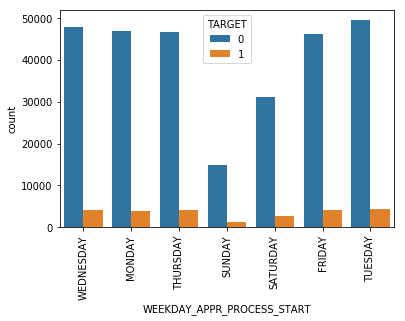

In [286]:
g = sns.countplot(x='WEEKDAY_APPR_PROCESS_START', hue='TARGET', data=df_main_train)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [288]:
categorical_mapper['WEEKDAY_APPR_PROCESS_START'] =  {'fillna': None, 'features': None}

#### 'ORGANIZATION_TYPE'

In [337]:
show_cat_info(df_main_train, 'ORGANIZATION_TYPE')

ORGANIZATION_TYPE

Value counts, train dataset:

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University             

In [291]:
df_main_train['ORGANIZATION_TYPE'].isnull().sum()

0

In [292]:
list(df_main_test['ORGANIZATION_TYPE'].unique())

['Kindergarten',
 'Self-employed',
 'Transport: type 3',
 'Business Entity Type 3',
 'Government',
 'Industry: type 9',
 'School',
 'Trade: type 2',
 'XNA',
 'Services',
 'Bank',
 'Industry: type 3',
 'Other',
 'Trade: type 6',
 'Industry: type 12',
 'Trade: type 7',
 'Postal',
 'Medicine',
 'Housing',
 'Business Entity Type 2',
 'Construction',
 'Military',
 'Industry: type 4',
 'Trade: type 3',
 'Legal Services',
 'Security',
 'Industry: type 11',
 'University',
 'Business Entity Type 1',
 'Agriculture',
 'Security Ministries',
 'Transport: type 2',
 'Industry: type 7',
 'Transport: type 4',
 'Telecom',
 'Emergency',
 'Police',
 'Industry: type 1',
 'Transport: type 1',
 'Electricity',
 'Industry: type 5',
 'Hotel',
 'Restaurant',
 'Advertising',
 'Mobile',
 'Trade: type 1',
 'Industry: type 8',
 'Realtor',
 'Cleaning',
 'Industry: type 2',
 'Trade: type 4',
 'Industry: type 6',
 'Culture',
 'Insurance',
 'Religion',
 'Industry: type 13',
 'Industry: type 10',
 'Trade: type 5']

In [293]:
df_main_train['ORGANIZATION_TYPE'].value_counts()/df_main_train.shape[0]

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

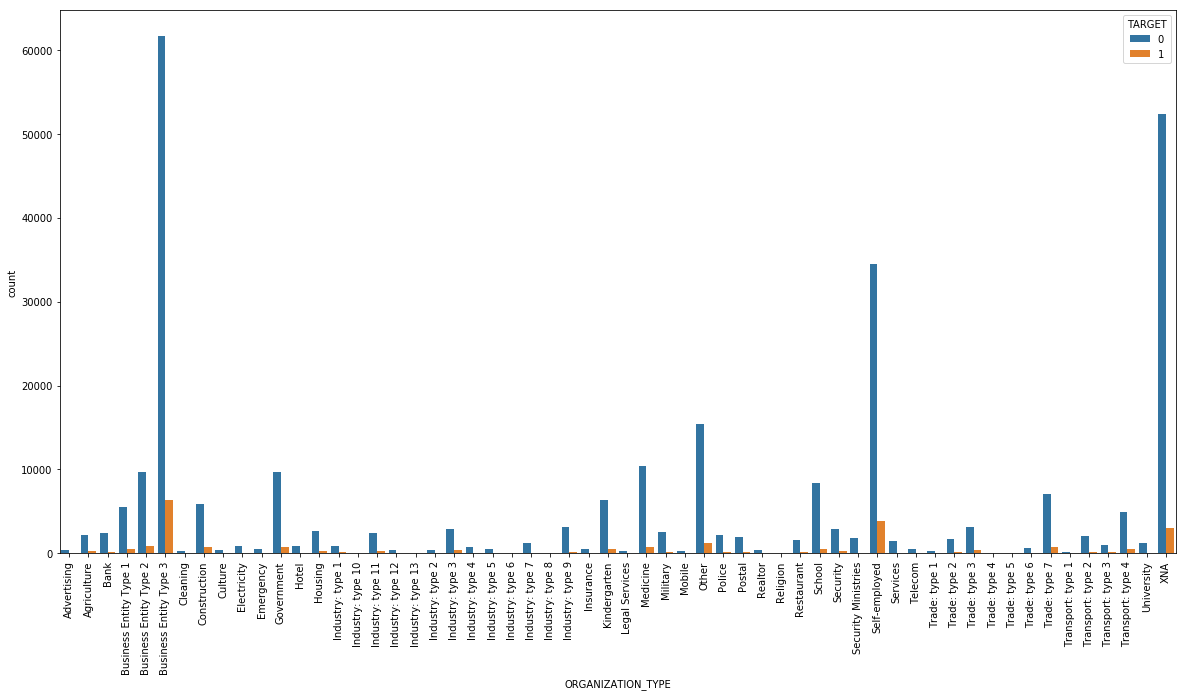

In [301]:
plt.subplots(figsize=(20,10))
g = sns.countplot(x='ORGANIZATION_TYPE', hue='TARGET', data=df_main_train, order = sorted(df_main_train['ORGANIZATION_TYPE'].unique()))

g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [302]:
group_orgt = df_main_train.groupby(df_main_train['ORGANIZATION_TYPE']).sum()['TARGET']
group_orgt/ df_main_train.groupby(df_main_train['ORGANIZATION_TYPE']).count()['TARGET']

ORGANIZATION_TYPE
Advertising               0.081585
Agriculture               0.104727
Bank                      0.051855
Business Entity Type 1    0.081384
Business Entity Type 2    0.085284
Business Entity Type 3    0.092996
Cleaning                  0.111538
Construction              0.116798
Culture                   0.055409
Electricity               0.066316
Emergency                 0.071429
Government                0.069781
Hotel                     0.064182
Housing                   0.079446
Industry: type 1          0.110683
Industry: type 10         0.064220
Industry: type 11         0.086538
Industry: type 12         0.037940
Industry: type 13         0.134328
Industry: type 2          0.072052
Industry: type 3          0.106162
Industry: type 4          0.101482
Industry: type 5          0.068447
Industry: type 6          0.071429
Industry: type 7          0.080337
Industry: type 8          0.125000
Industry: type 9          0.066805
Insurance                 0.056951
Ki